In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio

In [3]:
# Load data from emnist
data = sio.loadmat("emnist-byclass.mat")['dataset']

In [4]:
from sklearn.model_selection import train_test_split

trainSize = 0.5

X_train_data = data[0][0][0][0][0][0]
y_train_data = data[0][0][0][0][0][1]

X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, train_size=trainSize)


In [5]:
X_test = data[0][0][1][0][0][0]
y_test = data[0][0][1][0][0][1]

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [36]:
models = []
# numNeuron = [8, 12, 16, 20, 32, 64]
numNeuron = [100, 200, 300, 400, 500, 600]

for n in numNeuron:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n, input_dim=784, activation='linear'))
    model.add(tf.keras.layers.Dense(62, activation='softmax'))
    models.append(model)


In [37]:
for i in range(len(models)):
    models[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
for i in range(len(models)):
    models[i].fit(X_train, y_train, epochs=1)

10906/10906 [==============================] - 35s 3ms/step - loss: 1.1155 - accuracy: 0.6896


In [39]:
for i in range(len(models)):
    models[i].save(f'symbolRecon_Lin.model{numNeuron[i]}')

INFO:tensorflow:Assets written to: symbolRecon_Lin.model100\assets
INFO:tensorflow:Assets written to: symbolRecon_Lin.model200\assets
INFO:tensorflow:Assets written to: symbolRecon_Lin.model300\assets
INFO:tensorflow:Assets written to: symbolRecon_Lin.model400\assets
INFO:tensorflow:Assets written to: symbolRecon_Lin.model500\assets
INFO:tensorflow:Assets written to: symbolRecon_Lin.model600\assets


In [40]:
models = []
for n in numNeuron:
    models.append(tf.keras.models.load_model(f'symbolRecon_Lin.model{n}'))

In [41]:
models = []

for n in numNeuron:
    models.append(tf.keras.models.load_model(f'symbolRecon_Lin.model{n}'))

In [42]:
len(models)

6

In [43]:
results = []

for i in range(len(models)):
    results.append(models[i].evaluate(X_test, y_test))

3636/3636 [==============================] - 5s 1ms/step - loss: 1.0146 - accuracy: 0.7135


In [44]:
results = np.array(results)

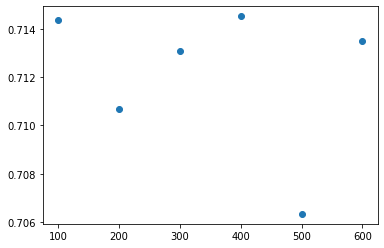

In [45]:
from unittest import result
import matplotlib.pyplot as plt

# plt.plot(numNeuron, results[:, 0])
plt.scatter(numNeuron, results[:, 1])

In [47]:
y_pred = []

for i in range(len(models)):
    temp = models[i].predict(X_test)
    y_pred.append(np.argmax(temp, axis=-1))

3636/3636 [==============================] - 5s 1ms/step


In [49]:
from sklearn.metrics import confusion_matrix

cmat = []

for i in range(len(y_pred)):
    cmat.append(confusion_matrix(y_test, y_pred[i]))

for cm in cmat:
    correct = 0
    for i in range(len(cm)):
        correct += cm[i][i]

    r = round((correct) / np.sum(cm), 4)
    print(f'Classifiation Rate: {r}')


Classifiation Rate: 0.7144
Classifiation Rate: 0.7107
Classifiation Rate: 0.7131
Classifiation Rate: 0.7145
Classifiation Rate: 0.7063
Classifiation Rate: 0.7135
